In [1357]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
(df_gamma_spread5.groupby('episode').aggregate('sum')['step_pnl'] -df_gamma_spread0.groupby('episode').aggregate('sum')['step_pnl']).std()

16.288736476019483

In [42]:
df_gamma_spread0.groupby('episode').aggregate('sum')['step_pnl'].std()

976.7067190169911

In [35]:
from environment import utils
from importlib import reload
reload(utils)
hedge_swaption, liab_swaption, _hedge_swap, liab_swap, liab_swaption_position, cov_hed_all, cov_liab_all, ttm_mat = utils.Utils().generate_swaption_market_data()
hedge_swap_ep = _hedge_swap[0]

utils initiated with spread=0, poisson_rate=1, n_episodes=1000

Memory usage before lmm: 371.40 MB
t_max set to 7
!!!! CONTRACT SIZE IS  1000.0

XXXXXXXXXXXXXXXXXXXXXX
 The spread is 0   
 nXXXXXXXXXXXXXXXXXXXXXX
Memory usage after: 371.40 MB

Memory usage after gc: 371.40 MB

Using  data/excited/20250508-212209_4y dataset


In [36]:
import numpy as np
np.mean(hedge_swaption[1:100,0,0,-1]*hedge_swaption[1:100,0,0,3]*0.02)

0.0002835374

In [37]:
np.mean(_hedge_swap[1:100,0,0,3])

0.04825143

In [38]:
np.mean(hedge_swaption[1:100,0,0,0])

0.014238279

In [39]:
np.mean(hedge_swaption[1:100,:,0,-1])

0.2416779

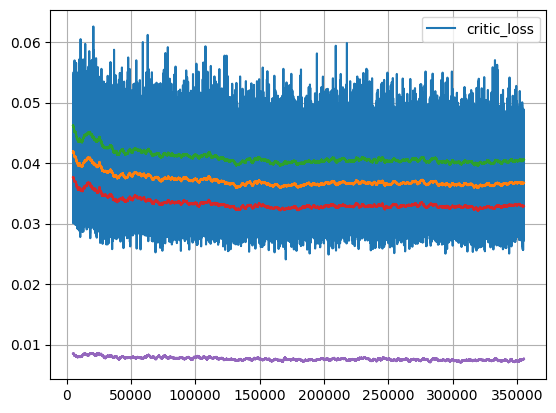

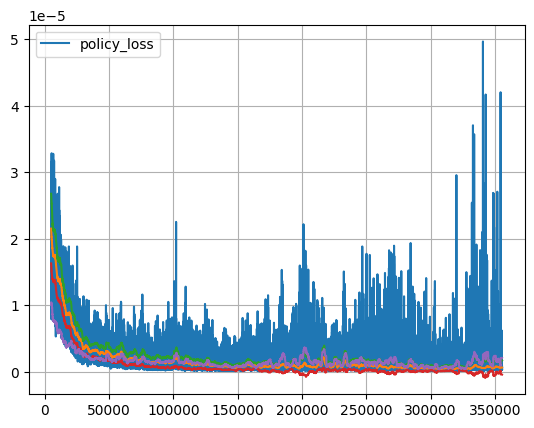

<Figure size 640x480 with 0 Axes>

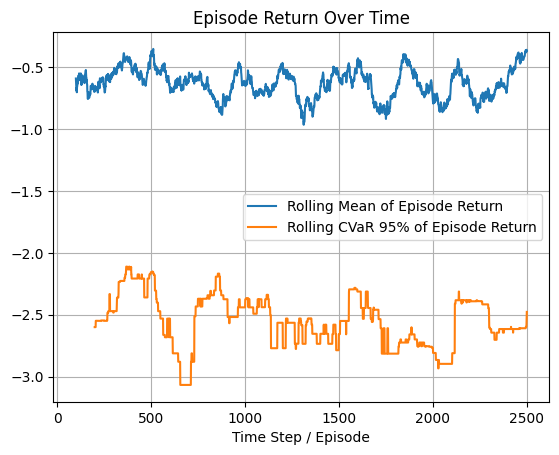

2501


In [4]:
import pandas as pd 
time_pure_log = '123128'
time= '001629'
df = pd.read_csv(f'/home/hedge/gamma-vega-rl-hedging/logs/run_20250513_{time}/RL/Huber/spread=0.005_obj=cvar_threshold=0.95_critic=qr-huber_v=0.3_hedttm=30/logs/learner/logs.csv')
df_eval = pd.read_csv(f'/home/hedge/gamma-vega-rl-hedging/logs/run_20250513_{time}/RL/Huber/spread=0.005_obj=cvar_threshold=0.95_critic=qr-huber_v=0.3_hedttm=30/logs/eval_env/logs.csv')
#time = '120609'
#df_old = pd.read_csv(f'/home/hedge/gamma-vega-rl-hedging/logs/run_20250509_{time}/RL/Huber/spread=0.05_obj=cvar_threshold=0.95_critic=qr-huber_v=0.3_hedttm=30/logs/learner/logs.csv')
df_train = pd.read_csv(f'/home/hedge/gamma-vega-rl-hedging/logs/run_20250513_{time}/RL/Huber/spread=0.005_obj=cvar_threshold=0.95_critic=qr-huber_v=0.3_hedttm=30/logs/train_loop/logs.csv'
                    )
#df_eval_old = pd.read_csv(f'/home/hedge/gamma-vega-rl-hedging/logs/run_20250509_{time}/RL/Huber/spread=0.05_obj=cvar_threshold=0.95_critic=qr-huber_v=0.3_hedttm=30/logs/eval_env/logs.csv'
#                    )
#df_eval = pd.read_csv(f'/home/hedge/gamma-vega-rl-hedging/logs/run_20250509_{time}/RL/Huber/spread=0.05_obj=cvar_threshold=0.95_critic=qr-huber_v=0.3_hedttm=30/logs/eval_env/logs.csv'
#                    )
import matplotlib.pyplot as plt
plt.clf()
#typ = 'policy'
typ = 'critic'
def plot_loss(typ,df):
    clip = 5000
    window = 2000
    df[f'{typ}_loss'].iloc[clip:].plot() 
    mean = df[f'{typ}_loss'].rolling(window=window).mean()[clip:]
    std = df[f'{typ}_loss'].rolling(window=window).std()[clip:]
    plt.plot(mean)
    plt.plot(mean+std)
    plt.plot(mean-std)
    plt.plot(std*2)
    plt.plot()
    plt.grid()
    plt.legend()
    plt.show()

plot_loss('critic',df)
#print("old")
#plot_loss('critic',df_old)

plot_loss('policy',df)
#print("old")
#plot_loss('policy',df_old)
#plt.clf()
#df['critic_loss'].plot()
#plt.legend()
#df_train['episode_return'].plot()
plt.clf()
# Calculate rolling mean for episode_return
episode_return_mean = df_train['episode_return'].rolling(window=100).mean() # Adjust window size as needed

# Calculate rolling 0.05 quantile for episode_return (CVaR 95%)
episode_return_cvar95 = df_train['episode_return'].rolling(window=200).quantile(0.05) # Adjust window size as needed

# Plotting
plt.figure() # Optional: Adjust figure size
plt.plot(episode_return_mean, label='Rolling Mean of Episode Return')
plt.plot(episode_return_cvar95, label='Rolling CVaR 95% of Episode Return')

plt.title('Episode Return Over Time')
plt.xlabel('Time Step / Episode') # Adjust label as appropriate for your data
#plt.ylabel('Episode Return')
plt.legend()
plt.grid(True)
plt.show()
print(len(df_train))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

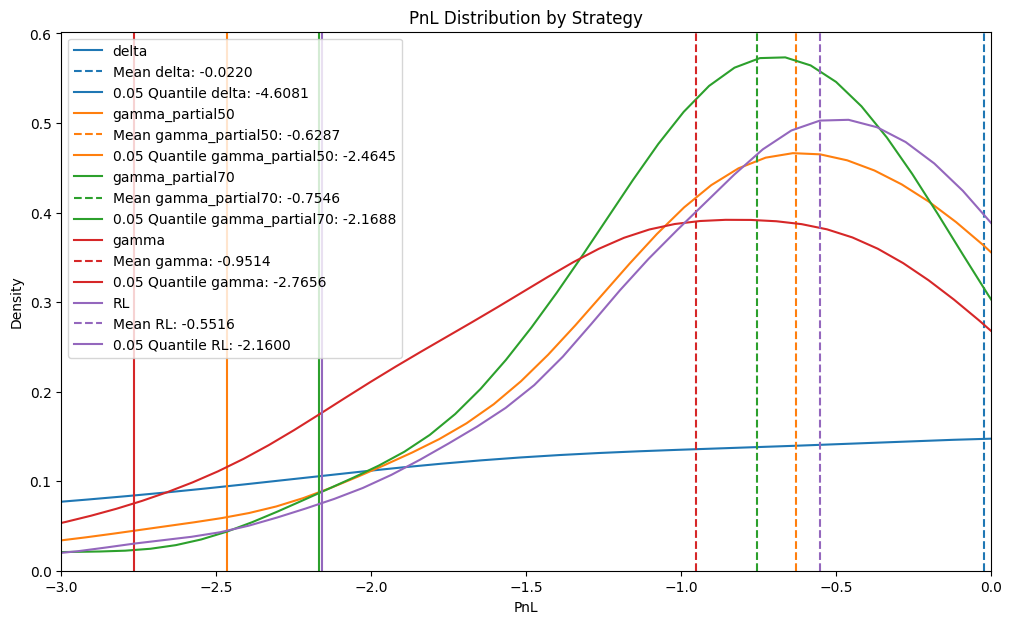

{'delta': {'mean': -0.02202203953851345,
  'std': 2.8301078837946285,
  'quantile_05': -4.60809232019425,
  'min': -10.6732693795,
  'max': 10.809620212},
 'gamma_partial50': {'mean': -0.6287267129021107,
  'std': 1.09726142080207,
  'quantile_05': -2.4645035118179996,
  'min': -6.0481760388,
  'max': 9.9433954176},
 'gamma_partial70': {'mean': -0.7545889089932788,
  'std': 0.9346494568256205,
  'quantile_05': -2.168792442805,
  'min': -5.529128714,
  'max': 9.5243610398},
 'gamma': {'mean': -0.9513514051111975,
  'std': 1.118802145531419,
  'quantile_05': -2.765571431195,
  'min': -5.7602463765,
  'max': 9.0396239368},
 'RL': {'mean': -0.5516332649358378,
  'std': 1.0119878899078751,
  'quantile_05': -2.1599659893544993,
  'min': -7.2509069612,
  'max': 10.10858062684}}

In [8]:
def plot_pnl_distribution(dataframes, labels=None, xlim=None, legend_prefix=""):
    """
    Plot KDE distributions of PnL for multiple dataframes.
    
    Parameters:
    -----------
    dataframes : dict or list
        If dict: {name: dataframe} pairs
        If list: List of dataframes
    labels : list, optional
        Labels for each dataframe (used if dataframes is a list)
    xlim : tuple, optional
        x-axis limits (min, max)
    legend_prefix : str, optional
        Prefix to add to legend entries
    """
    plt.figure(figsize=(12, 7))
    
    # Convert list to dict if needed
    if isinstance(dataframes, list):
        if labels is None:
            labels = [f"Dataset {i+1}" for i in range(len(dataframes))]
        dataframes = dict(zip(labels, dataframes))
    
    # Process each dataframe
    colors = sns.color_palette()
    for i, (name, df) in enumerate(dataframes.items()):
        # Calculate PnL sum per episode
        pnl_sum = df.groupby('episode')['step_pnl'].sum()
        
        # Plot KDE
        sns.kdeplot(pnl_sum, label=f"{name}")
        
        # Add vertical line for mean
        mean_val = pnl_sum.mean()
        plt.axvline(mean_val, color=colors[i], linestyle='--',
                   label=f'Mean {name}: {mean_val:.4f}')
        
        # Add vertical line for 0.05 quantile (CVaR 95%)
        quantile_val = pnl_sum.quantile(0.05)
        plt.axvline(quantile_val, color=colors[i], linestyle='-',
                   label=f'0.05 Quantile {name}: {quantile_val:.4f}')
    
    # Add plot details
    plt.title('PnL Distribution by Strategy')
    plt.xlabel('PnL')
    plt.ylabel('Density')
    
    if xlim:
        plt.xlim(xlim)
    
    #plt.grid(True)
    plt.legend()
    plt.show()
    
    # Return summary statistics
    results = {}
    for name, df in dataframes.items():
        pnl_sum = df.groupby('episode')['step_pnl'].sum()
        results[name] = {
            'mean': pnl_sum.mean(),
            'std': pnl_sum.std(),
            'quantile_05': pnl_sum.quantile(0.05),
            'min': pnl_sum.min(),
            'max': pnl_sum.max()
        }
    return results


def load_df(name, spread, dataset):
    df = pd.read_csv(f'/home/hedge/gamma-vega-rl-hedging/logs/greekhedge_spread={spread}/{dataset}/{name}/logs/eval_env/logs.csv'
                           )
    return df
spread = 0.005
dataset = 'stress'
names = ['delta', 'gamma_partial50', 'gamma_partial70', 'gamma']

df_list = [load_df(name,spread, 'stress') for name in names]
df_list.append(df_eval)
names.append('RL')
plot_pnl_distribution(df_list, names, xlim=(-3,-0))

In [1918]:
import numpy as np
print(np.mean(df_eval.groupby('episode').aggregate('sum')['cost_swaption_hed']))
print(np.mean(df_gamma_spread5.groupby('episode').aggregate('sum')['cost_swaption_hed']))

-0.011809687120970122
-0.02836780632072552


In [ ]:
np.mean(df_eval.groupby('episode').quantile(0.05)['step_pnl'])
print(np.mean(df_gamma_partial50.groupby('episode').quantile(0.05)['step_pnl'])-np.mean(df_gamma_spread5.groupby('episode').quantile(0.05)['step_pnl']))
np.mean(df_gamma_spread5.groupby('episode').quantile(0.05)['step_pnl'])

-0.0008242352869747283


-0.28393151339969197

In [1872]:
np.mean(df_eval_old.groupby('episode').quantile(0.05)['step_pnl'])

-0.16553054785331553

In [ ]:
df_gamma_partial50.groupby('episode').aggregate('sum')['step_pnl'].mean()*100-df_gamma_spread5.groupby('episode').aggregate('sum')['step_pnl'].mean()*100

3.0532041526842257